In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
sys.path.append(os.environ["CODE_REPOSITORY"])
from snudda.utils.load_network_simulation import SnuddaLoadNetworkSimulation
from code_repository.extract_amplitude.extract_event_amplitude import extract_event_amplitude

In [2]:
mean_num_synapses = 5 # Mean number of synapses between FS-iSPN

In [3]:
network_path = os.path.join("networks", "ispn_network")
network_file = os.path.join(network_path, "network-synapses.hdf5")

In [4]:
simulations = dict()

In [5]:

for g in glob.glob(os.path.join(network_path, "simulation", "vclamp.json")):

    name = os.path.basename(g).split(".")[0]
    with open(g, "r") as f:
        d = json.load(f)
    simulations.update({name : d})
   

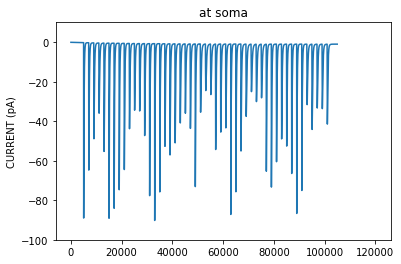

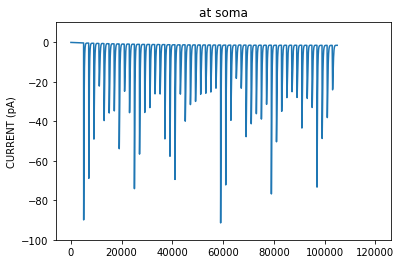

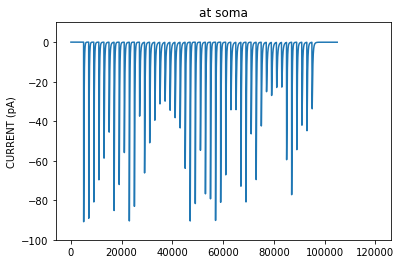

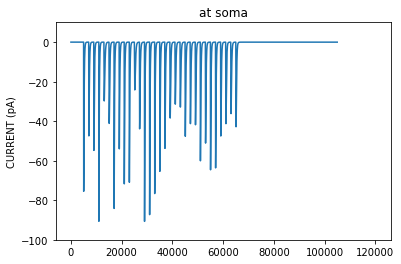

CPU times: user 495 ms, sys: 25.9 ms, total: 521 ms
Wall time: 513 ms


In [6]:
%%time
for r, k in enumerate(simulations.keys()):
    for cell_no in range(4):


        d = simulations[k][str(cell_no)]
    
        m = np.mean(np.array(d[10000:15000])*1e3)
        corr = np.array(d)*1e3 - m
        plt.figure()
        plt.title("at soma")
        plt.plot(corr[15000:])
        plt.plot(np.ones_like(d) * m)

        plt.ylabel("CURRENT (pA)")
        plt.ylim(-100,10)
plt.show()

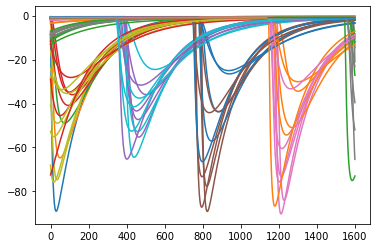

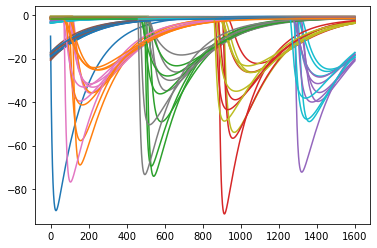

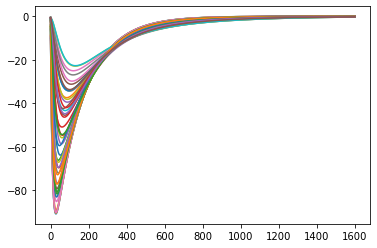

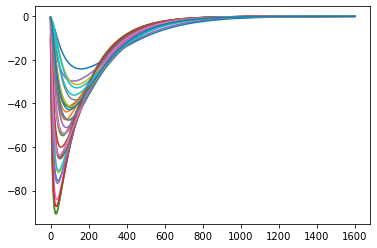

CPU times: user 665 ms, sys: 18.9 ms, total: 683 ms
Wall time: 679 ms


In [7]:
%%time
amplitudes = dict()
for r, k in enumerate(simulations.keys()):
    for cell_no in range(4):


        d = simulations[k][str(cell_no)]
    
        m = np.mean(np.array(d[10000:15000])*1e3)
        corr = np.array(d)*1e3 - m
        a = extract_event_amplitude(corr[15000:], threshold=-0.5, interval=40)
        amplitudes.update({cell_no : a })

In [8]:
mean = np.mean([np.abs(np.max(a[:50])) for n, a in amplitudes.items()]) 

In [9]:
print(f" Mmedian amplitude of single synapse {mean} pA")

 Mmedian amplitude of single synapse 90.804377373388 pA


In [10]:
print(f" Mean amplitude of single synapse {(mean * mean_num_synapses)} pA")

 Mean amplitude of single synapse 454.02188686693995 pA


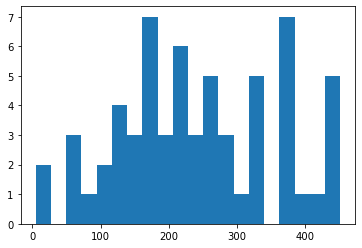

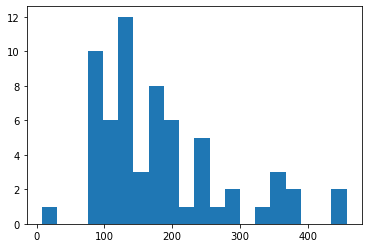

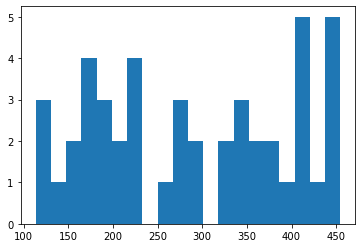

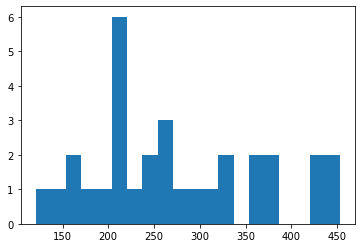

In [11]:
num_pair_synapse = 5
for n, amps in amplitudes.items():
    plt.figure()
    plt.hist(np.abs(amps) * num_pair_synapse, bins=20)

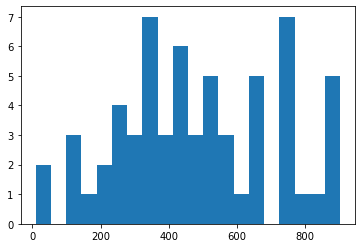

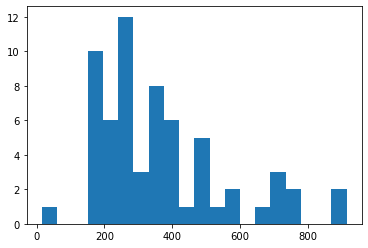

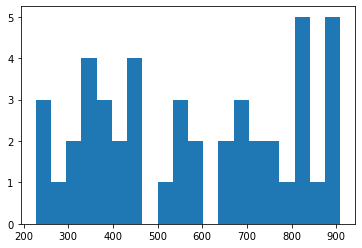

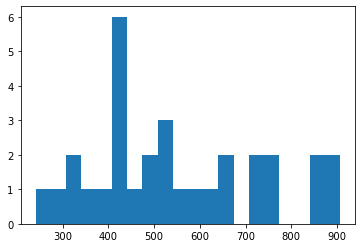

In [12]:
num_pair_synapse = 10
for n, amps in amplitudes.items():
    plt.figure()
    plt.hist(np.abs(amps) * num_pair_synapse, bins=20)